In [32]:
# Third party
import importlib
import torch
import matplotlib.pyplot as plt

# User
import base.abstract
import base.mlp
import base.train
import base.encode
import base.pre_process
import model

importlib.reload(base.abstract)
importlib.reload(base.mlp)
importlib.reload(base.train)
importlib.reload(base.encode)
importlib.reload(base.pre_process)
importlib.reload(model)

from base.train import sgd
from base.encode import get_encoder_decoder
from base.train import sgd
from base.pre_process import get_dataset
from model import RNN
from layer import RecurrentLayer

In [3]:
encoder, decoder = get_encoder_decoder(training_data="../data/shakespear.txt", type='character')
# let's now encode the entire text dataset and store it into a torch.Tensor
with open("../data/shakespear.txt", 'r', encoding='utf-8') as f:
    text = f.read()
text_encoded = torch.tensor(encoder(text), dtype=torch.long)
unique_chars = sorted(list(set(text)))


In [4]:
token_length = 3
dataset =  get_dataset(text_encoded, 3, context_window="fixed")
train_data, train_targets = dataset["train"]
validation_data, validation_targets = dataset["validation"]
len(train_data), len(validation_data)

(948085, 167309)

In [33]:
embedding_dim = 2
Embedding = torch.randn((len(unique_chars),embedding_dim),requires_grad=True, dtype=torch.float64)

hp = {
    "init_learning_rate": .1,
    "converging_learning_rate": .01,
    "learning_rate": .1,
    "epochs": 100000,
    "dim_of_embedding": embedding_dim,
    "num_layer_1_nodes": 10,
    "mini_batch_size": 3,
    "token_length": token_length
}

l1 = RecurrentLayer(
    num_of_inputs=hp['dim_of_embedding'],
    num_of_neurons=hp['num_layer_1_nodes'],
    activation_func=torch.tanh,
)
l2 = RecurrentLayer(
    num_of_inputs=hp['num_layer_1_nodes'],
    num_of_neurons=len(unique_chars),
)

model = RNN(hp, Embedding, [l1,l2])

In [6]:
loss_list = []
model.require_grad()
sgd(hp, model, train_data, train_targets, loss_list)

epoch: 0 / 100000, loss: 8.9950
epoch: 10000 / 100000, loss: 4.3953
epoch: 20000 / 100000, loss: 2.5247
epoch: 30000 / 100000, loss: 4.5930
epoch: 40000 / 100000, loss: 2.0207
epoch: 50000 / 100000, loss: 3.1202
epoch: 60000 / 100000, loss: 3.3929
epoch: 70000 / 100000, loss: 3.3890
epoch: 80000 / 100000, loss: 3.2963
epoch: 90000 / 100000, loss: 7.1111


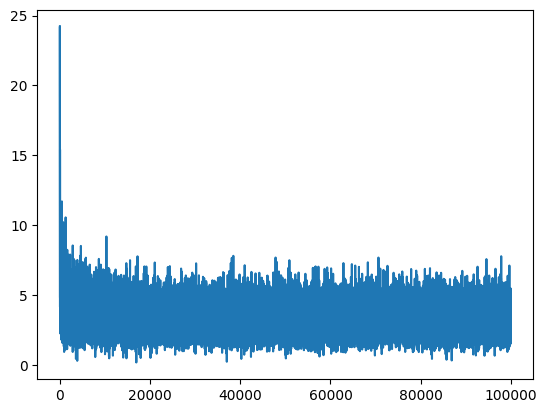

In [23]:
plt.plot(loss_list)

In [24]:
# Compute negative log likelihood of the train/validation

print(f"train loss: {model.dataset_loss(train_data,train_targets)}")
print(f"validation loss: {model.dataset_loss(validation_data, validation_targets)}" )


train loss: 3.171358403696496
validation loss: 3.171751037165118


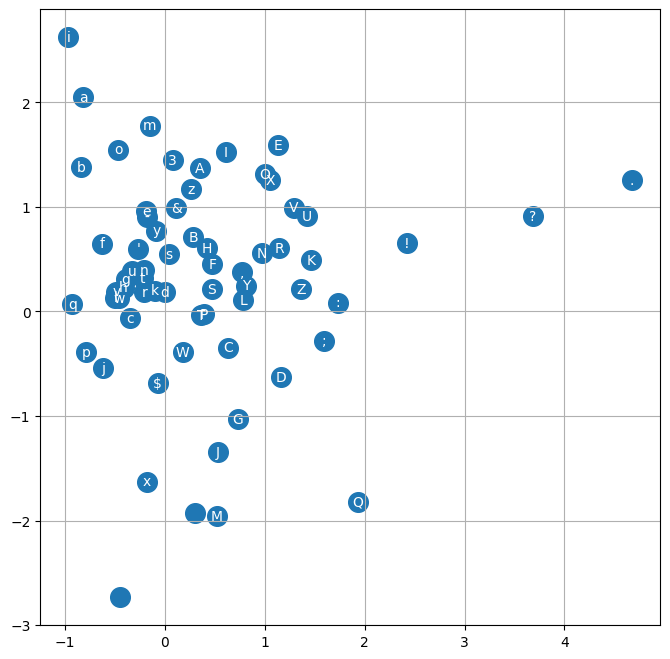

In [25]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
itos = {i: ch for i, ch in enumerate(unique_chars)}
plt.figure(figsize=(8,8))
plt.scatter(Embedding[:,0].data, Embedding[:,1].data, s=200)
for i in range(Embedding.shape[0]):
    plt.text(Embedding[i,0].item(), Embedding[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')



In [34]:
decoder(model.generate(200))


'TTTQTTTQTTTTTTQTTTTQTTTTTQTTTTnzTLTTTQTTTTTTQTTTTQQTTTQTTTQTTTTTTTTTTTFTTTTTTTQTTTzTTTTKTTTQTTTQTTTTQTTTTQQTTTTQTTTTQTTTTTTTKTTQTTTTTTTTTTXTTTTTTTKTTTTQTTTTTXTTTTTTTTQTTTTQQTTTXTTTTQTTTQTTTTTTXTTTTTTQ'